***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [1. Building the Concepts](01_00_introduction.ipynb)  
    * Previous: [1.8 Rotations in 2-D and 3-D](01_08_rotations_in_2-D_ and_3-D.ipynb)
    * Next: [1.10 Convolution](01_10_convolution.ipynb)

***

Import standard modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import specific modules:

In [2]:
 import pyfits

1. Creating a Gaussian Array
    1. [Mathematical Groundwork](#gaussianArray:sec:mathematical_groundwork)
    2. 
        1. [Creating a Gaussian with Variable](#gaussianArray:sec:variable_gaussian)
        2. [Making a Gaussian Asymmetric](#gaussianArray:sec:asymmetric_gaussian)
        3. [Rotating a Gaussian](#gaussianArray:sec:rotating_gaussian)

## 1.9 Creating a Gaussian Array

The mention of Gaussian array of course brings to perspective the Gaussian function. The gaussian function is a symmetric function also known as the bell curve. In image processing, we typically call it a Gaussian blur which is essentially a 2D gaussian.

### 1.9.1 Mathematical Groundwork<a id='gaussianArray:sec:mathematical_groundwork'></a><!--\label{gaussianArray:sec:mathematical_groundwork}-->

The gaussian function in one dimension is given by 

$\large f(x) = e^{-\frac{x^2}{2\sigma^2}}$

The sigma in the above equation is related to the full width at half maximum (FWHM) such that $FWHM = 2\sqrt{2ln2} \sigma \approx 2.3548 \sigma$

In two dimensions, the gaussian function is given by

$
\large f(x,y) = e^{-\frac{x^2 + y^2}{2\sigma^2}}, \small(\text{symmetric gaussian})\\
$ 
where $\sigma=\sigma_{x}=\sigma_{y}$

$
\large f(x,y) = e^{-\frac{x^2}{\sigma^2_{x}}+\frac{y^2}{\sigma^2_{y}}}, \small(\text{asymmetric gaussian})\\
$ 
where $\sigma_{x}\neq\sigma_{y}$

We would be concentrating on using the 2D gaussian for the illustrations. The tasks outined are as follows:

* Create a 2D gaussian of FWHM 30 arcsec
* Make the size of the gaussian map variable
    - Determine the x where the gaussian is 1/10000000. Size is then 2x.
* Make the gaussian asymmetric by determining different FWHMs for the x-axis (60 arcsec) and y-axis (120 arcsec)
* Rotate the Gaussian by 30 degrees anticlockwise.

Before we move on, we first have to determine from our fits file, the size of the pixel (value in degrees) and use that to produce an arcsec equivalent for the FWHMs provided above.
How this works is to retrieve the value of the CDELT variable in the fits header file and convert for 30", 60" & 120" respectively.

In [3]:
data, header = pyfits.getdata('/home/samuel/software/samtirifik-master/chapter_01_concepts/01_data/n2541_lr_in.fits',header=True)
pix_val = abs(header['CDELT1'])
fwhm = 30./(pix_val*3600)
fwhmX = 60./(pix_val*3600)
fwhmY = 120./(pix_val*3600)

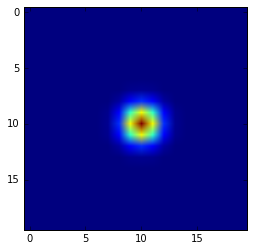

In [15]:
#task 1

def symGaussian(size,fwhm=fwhm,center=None):
    """
    make a square gaussian kernel
    size is the length of the side of a square
    fwhm is the full width at half maximum which can be thought of as the effective radius
    center indicates where the gaussian should be centered
    
    Example
    symGaussian(10,fwhm=3,(50,50))
    """
    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]
    sigma = fwhm/2.35
    
    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]
    
    return np.exp(-(((x-x0)**2 + (y-y0)**2) / (2*sigma**2)))

plt.imshow(symGaussian(20))

### 1.9.2.1 Creating a Gaussian with Variable<a id='gaussianArray:sec:variable_gaussian'></a><!--\label{gaussianArray:sec:variable_gaussian}-->

Moving ahead, we want to produce a gaussian whose size is variable such that the gaussian size would be 2x at the point where the gaussian is $10^{-7}$. In order to produce a variable gaussian, the function had to be inverted to determine the x where the gaussian function is $10^{-7}$.

$e^{-\frac{x^2 + y^2}{\sigma^2}} = 10^{-7}$

${-\frac{x^2 + y^2}{2\sigma^2}} = ln10^{-7}$

$ x^2 + y^2 = -2\sigma^2ln10^{-7}$

$ x^2 < -2\sigma^2ln10^{-7}$,$\hspace{1cm} y^2 < -2\sigma^2ln10^{-7}$

It can thus be deduced from the above that the gaussian size would be: $2*\sqrt{-2\sigma^2ln10^{-7}}$

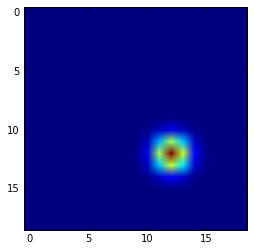

In [17]:
#task 2
def varGaussian(gVal,fwhm=fwhm,center=None):
    """
    make a square gaussian kernel
    gVal is the gaussian value for whose x the size s twice
    fwhm is the full width at half maximum which can be thought of as the effective radius
    center indicates where the gaussian should be centered
    
    Example
    varGaussian(10,fwhm=3,(50,50))
    """
    sigma = fwhm/2.35
    upperLimit = np.sqrt(-2*(sigma**2)*np.log(gVal))
    lowerLimit = -np.sqrt(-2*(sigma**2)*np.log(gVal))
    size = 2*upperLimit
    
    x = np.arange(lowerLimit,size, 1, float)
    y = x[:,np.newaxis]
    
    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]
    
    return np.exp(-(((x-x0)**2 + (y-y0)**2) / 2*sigma**2))

plt.imshow(varGaussian(10**-7))

### 1.9.2.2 Making a Gaussian Asymmetric<a id='gaussianArray:sec:asymmetric_gaussian'></a><!--\label{gaussianArray:sec:asymmetric_gaussian}-->

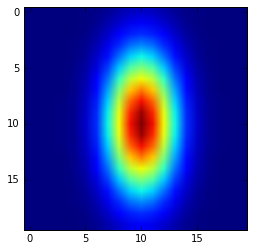

In [38]:
#task 3
def asyGaussian(size,fwhmX=fwhmX, fwhmY=fwhmY, center=None):
    """
    make a square gaussian kernel
    size is the length of the side of a square
    fwhm is the full width at half maximum which can be thought of as the effective radius
    center indicates where the gaussian should be centered
    
    
    Example
    asyGaussian(10,fwhmX=3,fwhmY=9,(50,50))
    """
    sigmaX = fwhmX/2.35
    sigmaY = fwhmY/2.35
    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]
    
    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]
    
    return np.exp(-(((x-x0)**2/(2*sigmaX**2)) + ((y-y0)**2/(2*sigmaY**2))))

plt.imshow(asyGaussian(20))

### 1.9.2.3 Rotating a Gaussian<a id='gaussianArray:sec:rotating_gaussian'></a><!--\label{gaussianArray:sec:rotating_gaussian}-->

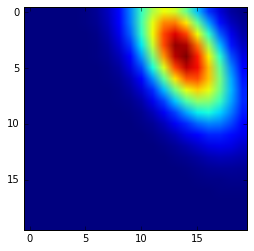

In [39]:
#task 4
def rotateFunction(x,y,theta):
    c, s = np.cos(np.radians(theta)), np.sin(np.radians(theta))
    return x*c - y*s, x*s + y*c

def rotatedGaussian(theta,size,fwhmX=fwhmX,fwhmY=fwhmY,center=None):
    """ 
    Rotated asymmetric gaussian (counterclockwise)
    Theta is the angle of rotation
    size is the length of the side of a square
    fwhm is the full width at half maximum which can be thought of as the effective radius
    center indicates where the gaussian should be centered
    
    example
    rotatedGaussian(30,20)
    """
    sigmaX = fwhmX/2.35
    sigmaY = fwhmY/2.35
    x = np.arange(0,size, 1, float)
    y = x[:,np.newaxis]
    
    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]
    
    xPrime, yPrime = rotateFunction(x,y,theta)[0],rotateFunction(x,y,theta)[1]
    
    return np.exp(-(((xPrime-x0)**2/(2*sigmaX**2)) + ((yPrime-y0)**2/(2*sigmaY**2))))

plt.imshow(rotatedGaussian(30,20))

***

* Next: [1.10 Convolution](01_10_convolution.ipynb)